In [56]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
remote = mysql.connector.connect(
    host = "****",
    port = "3306",
    user = "****",
    password = "****",
    database = "F1_Analysis"
)

In [3]:
cur = remote.cursor()

In [5]:
year = ["2019", "2020", "2021", "2022", "2023", "2024"]

In [ ]:
sql = "select * from FL_effect where year = 2021;"
cur.execute(sql)
cur.fetchall

In [73]:
data_total = {}
for each in year:
    query = "select FL_constructor, FL_driver, FL_rank from FL_effect where year = %s;"
    cur.execute(query, (each,))
    data = cur.fetchall()
    data_total[f"{each}"] = data
    for i, record in enumerate(data_total[each]):
        record = list(record)
        record[1] = record[1].replace("\xa0", ' ')
        data_total[each][i] = tuple(record)
print(data_total)

{'2019': [('Mercedes', 'Valtteri Bottas', 1), ('Ferrari', 'Charles Leclerc', 3), ('Red Bull Racing Honda', 'Pierre Gasly', 6), ('Ferrari', 'Charles Leclerc', 5), ('Mercedes', 'Lewis Hamilton', 1), ('Red Bull Racing Honda', 'Pierre Gasly', 5), ('Mercedes', 'Valtteri Bottas', 4), ('Ferrari', 'Sebastian Vettel', 5), ('Red Bull Racing Honda', 'Max Verstappen', 1), ('Mercedes', 'Lewis Hamilton', 1), ('Red Bull Racing Honda', 'Max Verstappen', 1), ('Red Bull Racing Honda', 'Max Verstappen', 2), ('Ferrari', 'Sebastian Vettel', 4), ('Mercedes', 'Lewis Hamilton', 3), ('Haas Ferrari', 'Kevin Magnussen', 17), ('Mercedes', 'Lewis Hamilton', 1), ('Mercedes', 'Lewis Hamilton', 3), ('Ferrari', 'Charles Leclerc', 4), ('Ferrari', 'Charles Leclerc', 4), ('Mercedes', 'Valtteri Bottas', 20), ('Mercedes', 'Lewis Hamilton', 1)], '2020': [('McLaren Renault', 'Lando Norris', 3), ('McLaren Renault', 'Carlos Sainz', 9), ('Mercedes', 'Lewis Hamilton', 1), ('Red Bull Racing Honda', 'Max Verstappen', 2), ('Mercede

In [119]:
podium_driver = {}
FL_podium_ratio = {}
for each in year:
    podium_num = 0
    round_count = len(data_total[each])
    for record in data_total[each]:
        if 1 <= record[2] <= 3: # if podium,
            podium_num += 1
            if record[1] in podium_driver:
                podium_driver[record[1]] += 1
            else:
                podium_driver[record[1]] = 1
    FL_podium_ratio[each] = f"{podium_num/round_count*100:.2f}%"
        
print(podium_driver)
print(FL_podium_ratio)

{'Valtteri Bottas': 6, 'Charles Leclerc': 7, 'Lewis Hamilton': 20, 'Max Verstappen': 28, 'Lando Norris': 5, 'Daniel Ricciardo': 1, 'Sergio Perez': 2, 'Carlos Sainz': 1, 'George Russell': 1}
{'2019': '52.38%', '2020': '64.71%', '2021': '66.67%', '2022': '63.64%', '2023': '60.00%', '2024': '37.50%'}


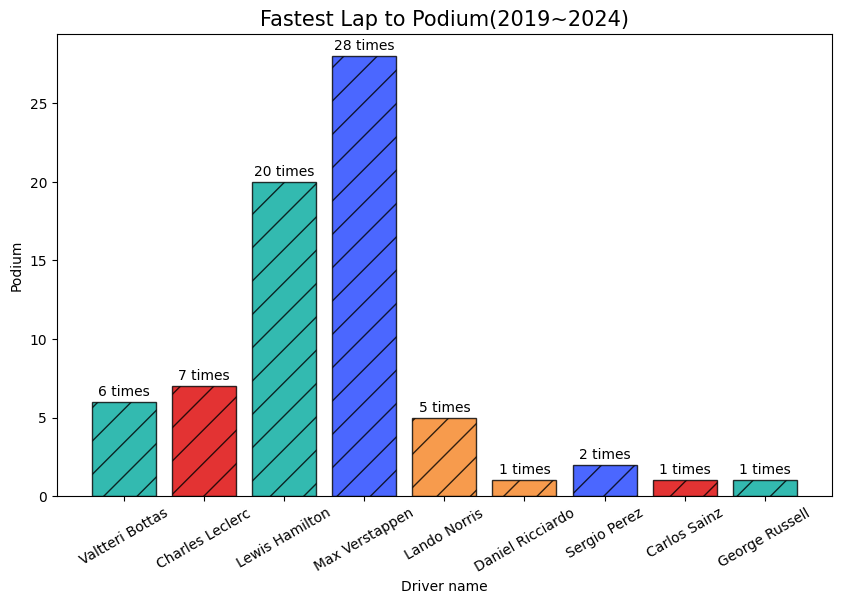

In [120]:
colors = ["#00A99D", "#DC0000", "#00A99D", "#1E41FF", "#F58220", "#F58220", "#1E41FF", "#DC0000", "#00A99D"]

plt.figure(figsize=(10, 6))
bars = plt.bar(podium_driver.keys(), podium_driver.values(), color=colors, edgecolor='black', alpha=0.8, hatch='/')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, str(yval)+" times", ha='center', va='bottom')  
     
plt.title("Fastest Lap to Podium(2019~2024)", fontsize=15)
plt.xticks(rotation=30)
plt.xlabel("Driver name")
plt.ylabel("Podium")
plt.show()

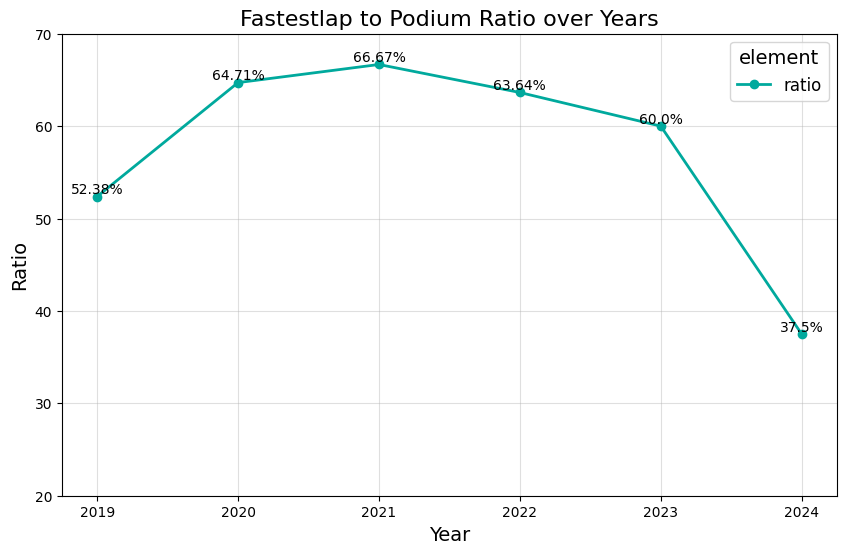

In [121]:
plt.figure(figsize=(10, 6))

for each in year:
    FL_podium_ratio[each] = FL_podium_ratio[each].replace("%",'')
    FL_podium_ratio[each] = float(FL_podium_ratio[each])

plt.plot(FL_podium_ratio.keys(), FL_podium_ratio.values(), label='ratio', color="#00A99D", marker='o', linewidth=2)

key_list = list(FL_podium_ratio.keys())
value_list = list(FL_podium_ratio.values())

for i in range(len(FL_podium_ratio)):
    plt.text(key_list[i], value_list[i] + 0.3, str(value_list[i])+"%", ha='center', fontsize=10, color="black")

plt.title("Fastestlap to Podium Ratio over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Ratio", fontsize=14)
plt.ylim((20,70))

plt.legend(title="element", fontsize=12, title_fontsize=14)
plt.grid(alpha=0.4)

plt.show()

In [79]:
for each in year:
    print(data_total[each])

[('Mercedes', 'Valtteri Bottas', 1), ('Ferrari', 'Charles Leclerc', 3), ('Red Bull Racing Honda', 'Pierre Gasly', 6), ('Ferrari', 'Charles Leclerc', 5), ('Mercedes', 'Lewis Hamilton', 1), ('Red Bull Racing Honda', 'Pierre Gasly', 5), ('Mercedes', 'Valtteri Bottas', 4), ('Ferrari', 'Sebastian Vettel', 5), ('Red Bull Racing Honda', 'Max Verstappen', 1), ('Mercedes', 'Lewis Hamilton', 1), ('Red Bull Racing Honda', 'Max Verstappen', 1), ('Red Bull Racing Honda', 'Max Verstappen', 2), ('Ferrari', 'Sebastian Vettel', 4), ('Mercedes', 'Lewis Hamilton', 3), ('Haas Ferrari', 'Kevin Magnussen', 17), ('Mercedes', 'Lewis Hamilton', 1), ('Mercedes', 'Lewis Hamilton', 3), ('Ferrari', 'Charles Leclerc', 4), ('Ferrari', 'Charles Leclerc', 4), ('Mercedes', 'Valtteri Bottas', 20), ('Mercedes', 'Lewis Hamilton', 1)]
[('McLaren Renault', 'Lando Norris', 3), ('McLaren Renault', 'Carlos Sainz', 9), ('Mercedes', 'Lewis Hamilton', 1), ('Red Bull Racing Honda', 'Max Verstappen', 2), ('Mercedes', 'Lewis Hamilto

/tmp/ipykernel_20541/2075178965.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(driver_freq.keys(), rotation=30)
/tmp/ipykernel_20541/2075178965.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(constructor_freq.keys(),rotation=30)


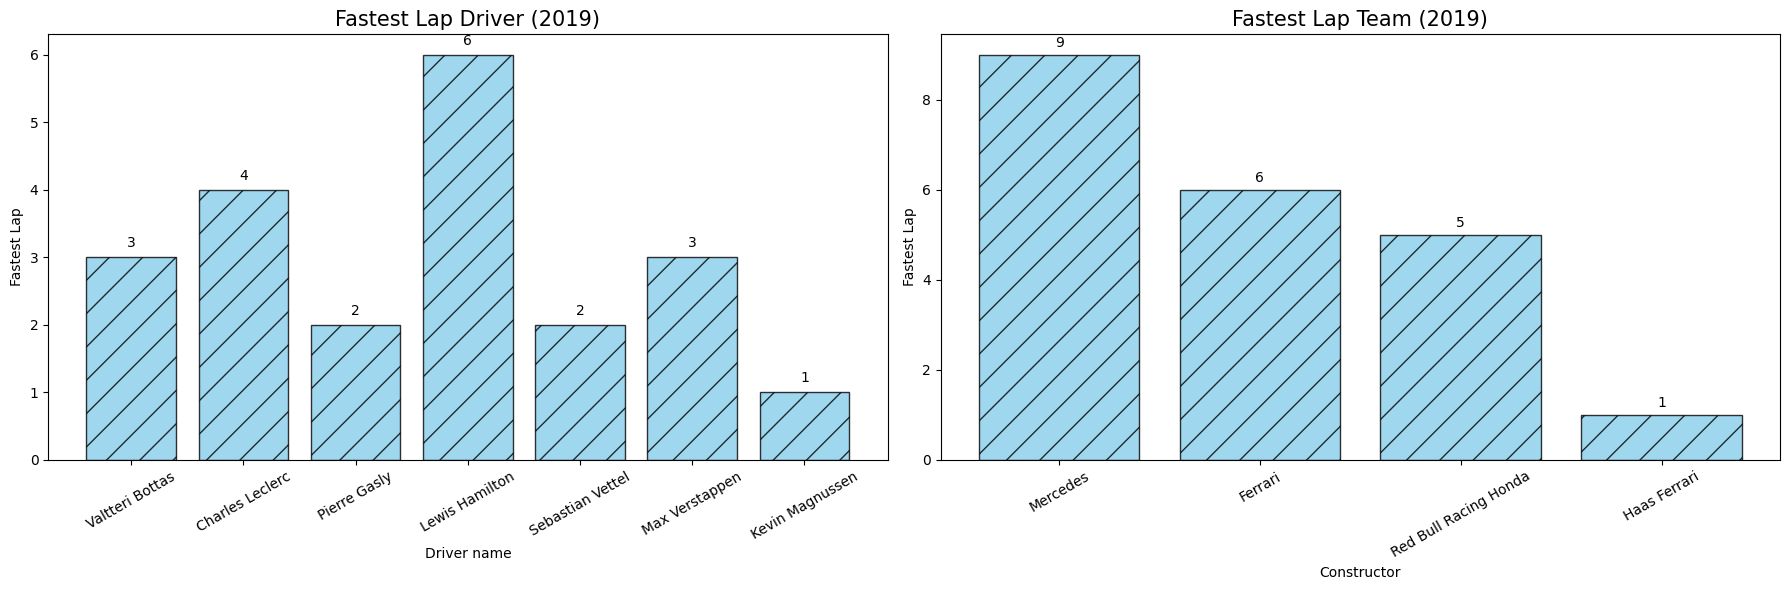

/tmp/ipykernel_20541/2075178965.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(driver_freq.keys(), rotation=30)
/tmp/ipykernel_20541/2075178965.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(constructor_freq.keys(),rotation=30)


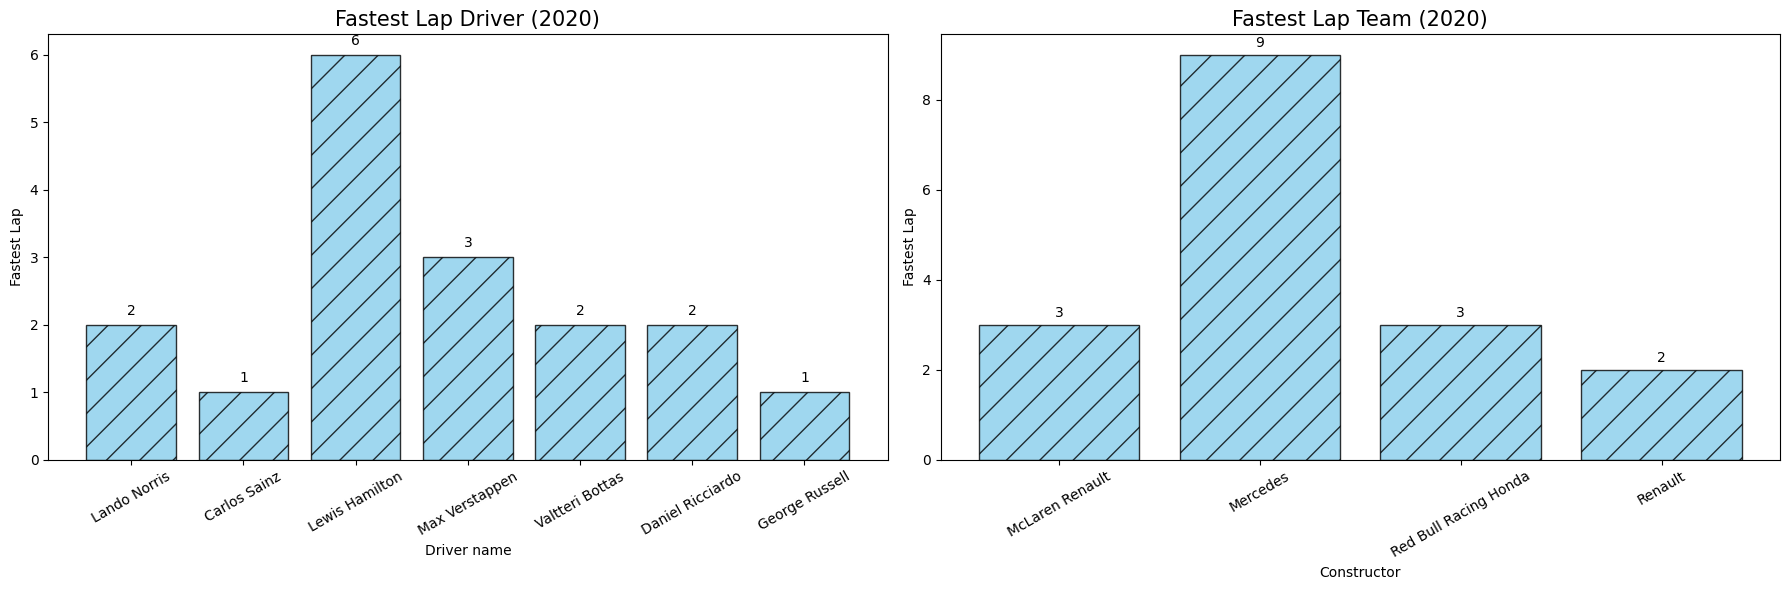

/tmp/ipykernel_20541/2075178965.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(driver_freq.keys(), rotation=30)
/tmp/ipykernel_20541/2075178965.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(constructor_freq.keys(),rotation=30)


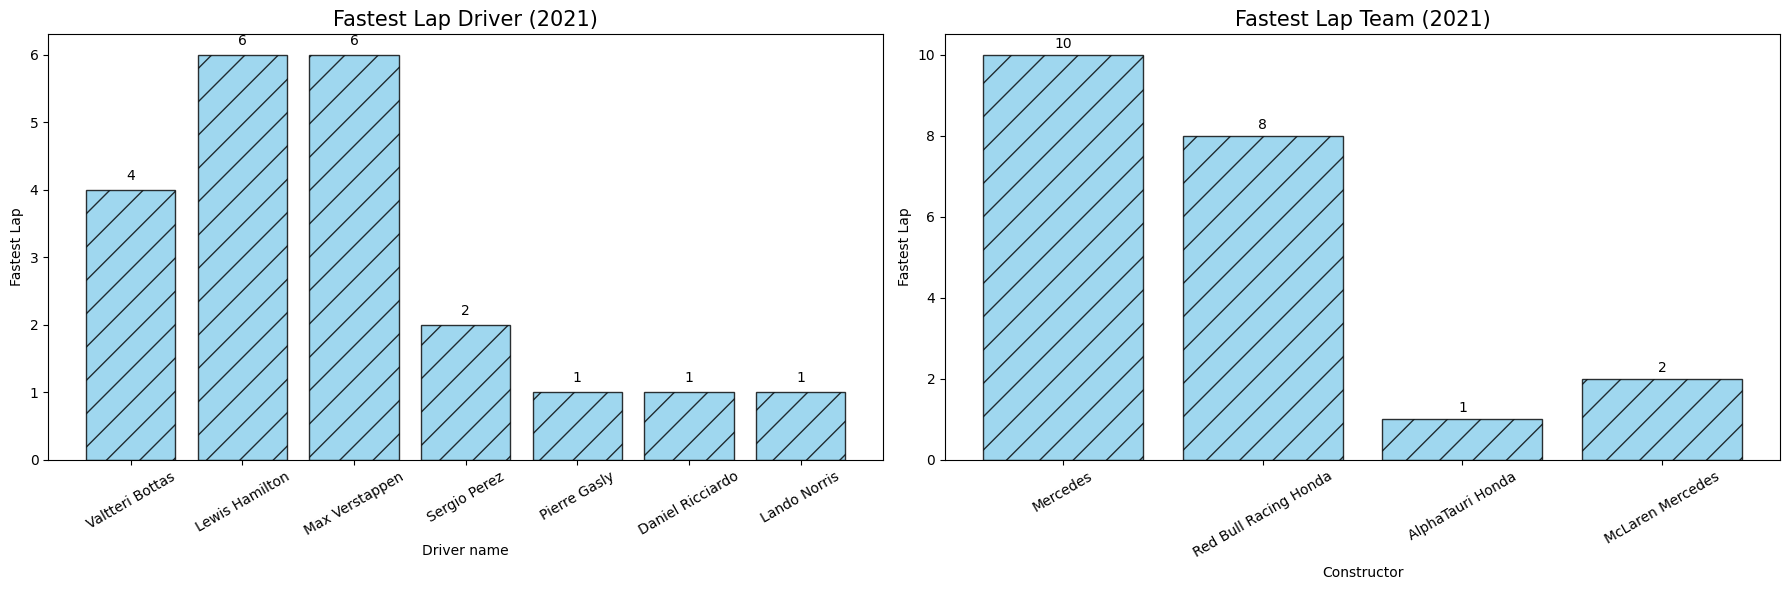

/tmp/ipykernel_20541/2075178965.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(driver_freq.keys(), rotation=30)
/tmp/ipykernel_20541/2075178965.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(constructor_freq.keys(),rotation=30)


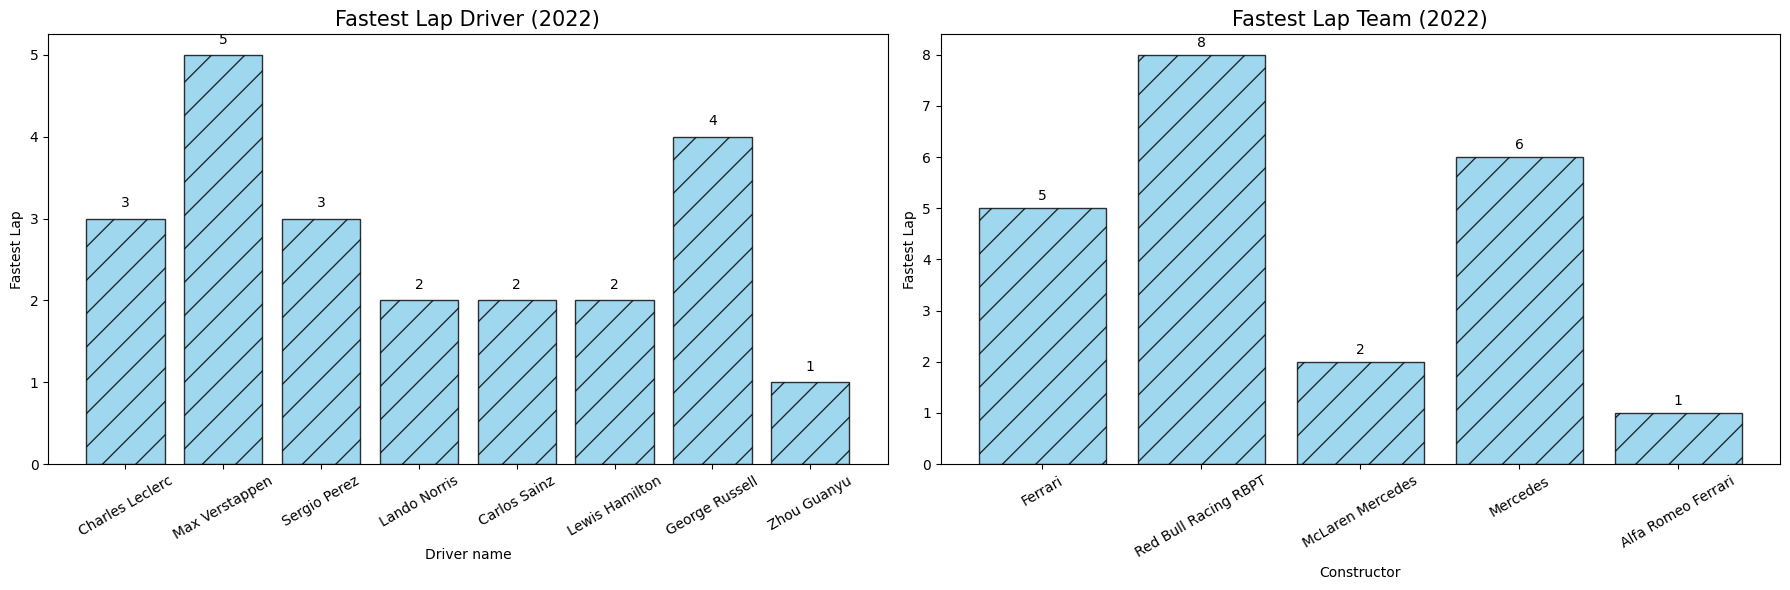

/tmp/ipykernel_20541/2075178965.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(driver_freq.keys(), rotation=30)
/tmp/ipykernel_20541/2075178965.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(constructor_freq.keys(),rotation=30)


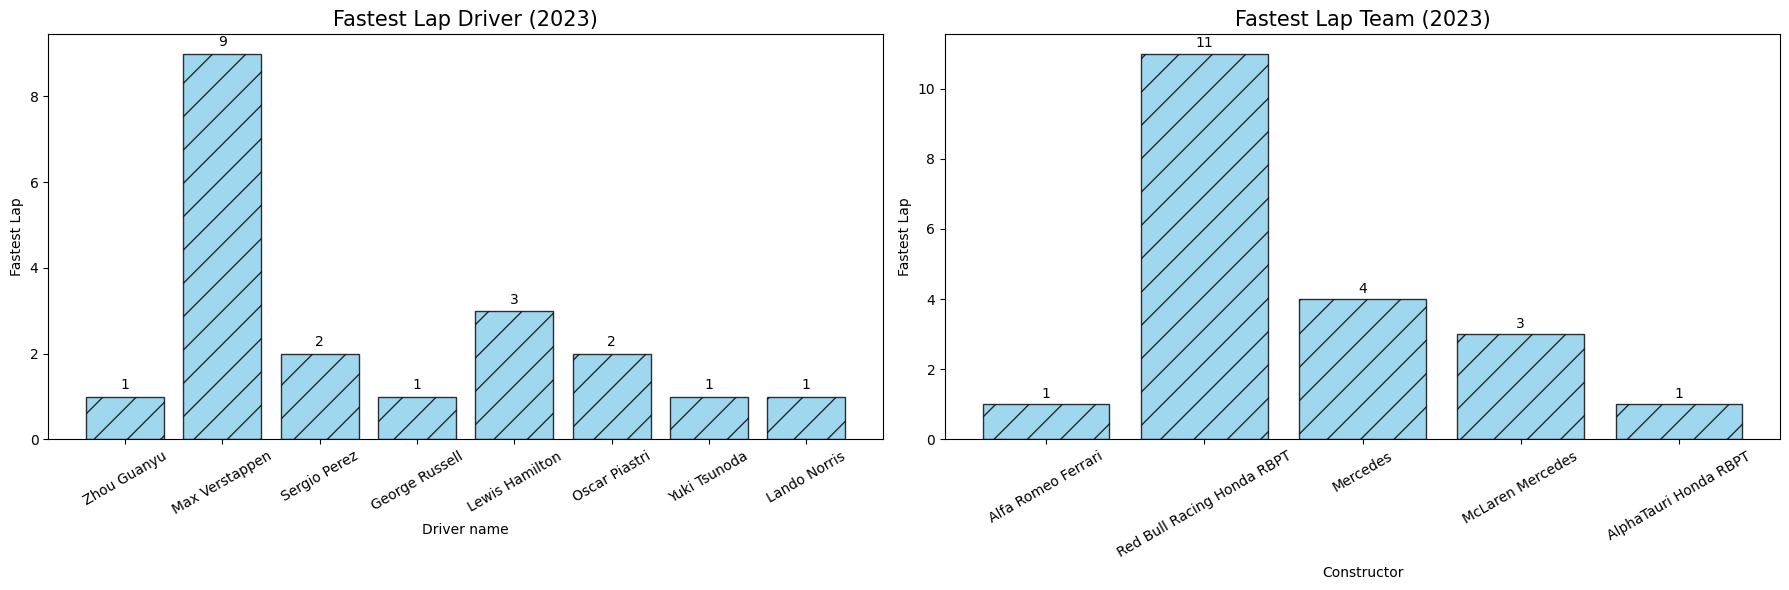

/tmp/ipykernel_20541/2075178965.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(driver_freq.keys(), rotation=30)
/tmp/ipykernel_20541/2075178965.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(constructor_freq.keys(),rotation=30)


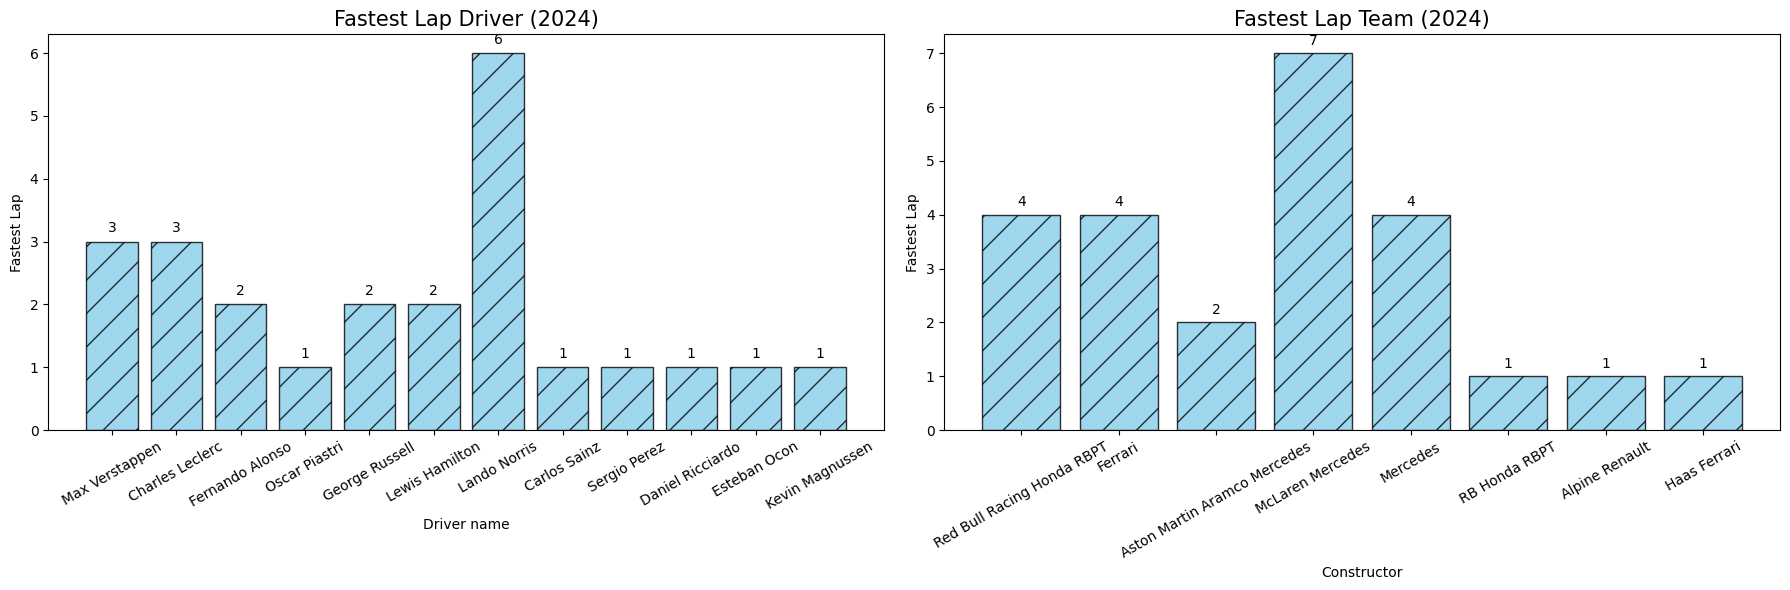

In [135]:
for each in year:
    driver_freq = {}
    constructor_freq = {}
    for record in data_total[each]:
        if record[0] in constructor_freq:
            constructor_freq[record[0]] += 1
        else:
            constructor_freq[record[0]] = 1
        
        if record[1] in driver_freq:
            driver_freq[record[1]] += 1
        else:
            driver_freq[record[1]] = 1

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    bars_driver = axes[0].bar(driver_freq.keys(), driver_freq.values(), color="skyblue", edgecolor='black', alpha=0.8, hatch='/')

    for bar in bars_driver:
        yval = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.1, str(yval), ha='center', va='bottom')  
        
    axes[0].set_title(f"Fastest Lap Driver ({each})", fontsize=15)
    axes[0].set_xticklabels(driver_freq.keys(), rotation=30)
    axes[0].set_xlabel("Driver name")
    axes[0].set_ylabel("Fastest Lap")

    bars_constructor = axes[1].bar(constructor_freq.keys(), constructor_freq.values(), color="skyblue", edgecolor='black', alpha=0.8, hatch='/')

    for bar in bars_constructor:
        yval = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.1, str(yval), ha='center', va='bottom')  
        
    axes[1].set_title(f"Fastest Lap Team ({each})", fontsize=15)
    axes[1].set_xticklabels(constructor_freq.keys(),rotation=30)
    axes[1].set_xlabel("Constructor")
    axes[1].set_ylabel("Fastest Lap")
    plt.tight_layout()
    plt.show()


            